,datahora,internacoes_ultimo_dia
17,2020-10-08,1324
35,2020-10-09,1284
53,2020-10-10,1204
71,2020-10-11,951
89,2020-10-12,844
...,...,...
3221,2021-04-04,2634
3239,2021-04-05,2373
3257,2021-04-06,2569
3275,2021-04-07,2767


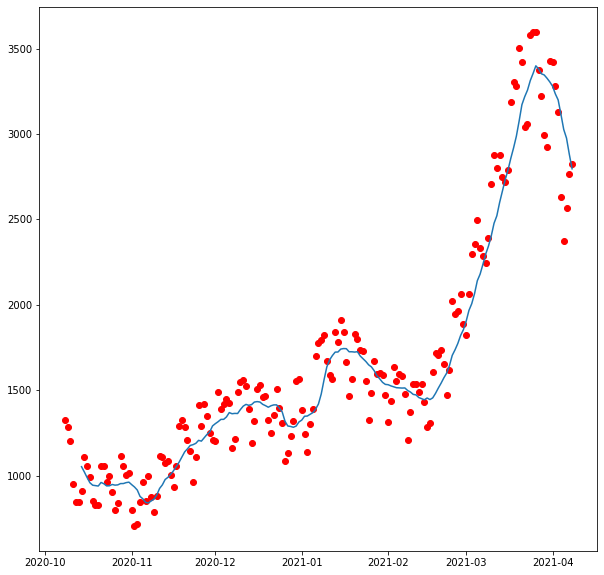

In [1]:
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
%matplotlib inline
ender = 'https://github.com/seade-R/dados-covid-sp/blob/master/data/plano_sp_leitos_internacoes_serie_nova.csv'
download = requests.get(ender)
soup = BeautifulSoup(download.content, 'html.parser')
tabela = soup.find_all('td', class_='blob-code blob-code-inner js-file-line')
S=[item.text.split(';') for item in tabela]
df = pd.DataFrame(S[1:], columns = S[0])
df['datahora']=pd.to_datetime(df['datahora'], format='%Y-%m-%d')
df['internacoes_ultimo_dia']=df['internacoes_ultimo_dia'].astype(int)
dfSP=df[df.nome_drs=="Estado de São Paulo"]
#dfSP=df[df.nome_drs=="DRS 01 Grande São Paulo"]
dfAux=dfSP[['datahora','internacoes_ultimo_dia']]
x=dfAux['datahora'].values
y=dfAux['internacoes_ultimo_dia'].values
janela=7
mm=[]
for idx, val in enumerate(y):
    if idx+1>=janela: mm.append(sum(y[idx+1-janela:idx+1])/janela)
    
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y,'ro')
ax.plot(x[6:],mm)
dfAux
